Precisión del modelo SVM: 86.73%

Reporte de Clasificación:
                   precision    recall  f1-score   support

    AndresCalzada       0.67      0.80      0.73         5
     ArathDaniela       0.75      1.00      0.86         3
           Ariana       1.00      0.67      0.80         3
           Camila       1.00      0.83      0.91         6
            Cielo       0.86      0.67      0.75         9
           DafneA       0.40      1.00      0.57         2
           Daniel       1.00      0.67      0.80         3
          Daniel2       0.67      1.00      0.80         2
            David       1.00      1.00      1.00         2
           Didier       0.67      0.67      0.67         3
             Erik       1.00      1.00      1.00         2
           Esther       1.00      1.00      1.00         3
        Francisco       1.00      0.67      0.80         3
          Ignacio       0.75      1.00      0.86         3
             Irma       0.80      1.00      0.89      

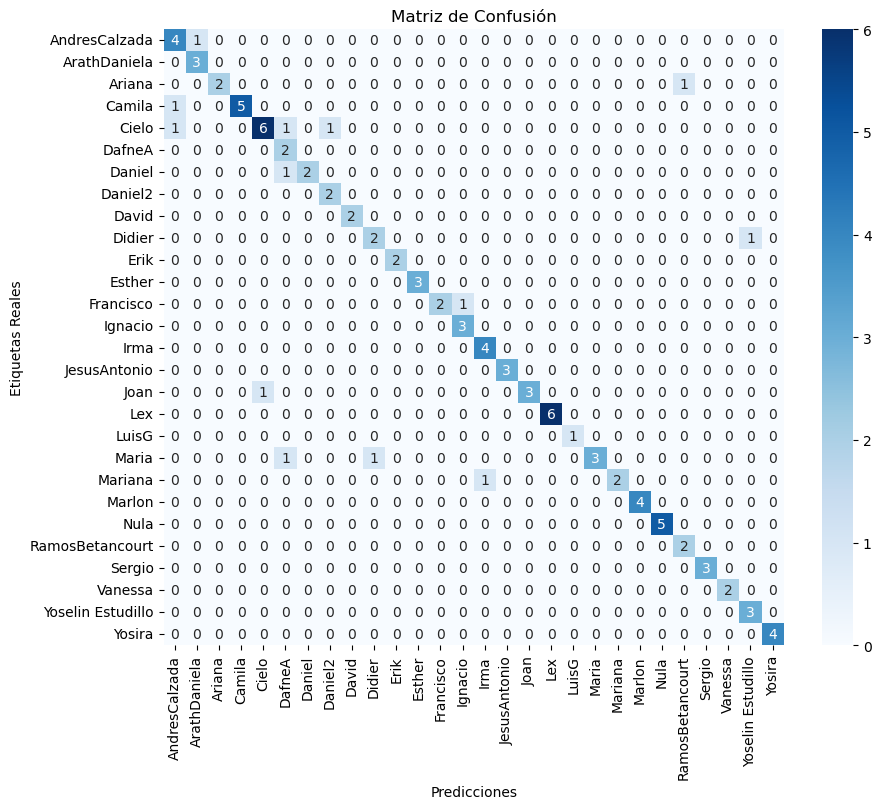

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


csv_path = "mfcc_featuresMeth2.csv"  
df = pd.read_csv(csv_path)

X = df.drop(columns=["Label"])  
y = df["Label"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm_model2 = SVC(kernel="linear", random_state=42)  
svm_model2.fit(X_train, y_train)


y_pred = svm_model2.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo SVM: {accuracy * 100:.2f}%")


print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=svm_model2.classes_, yticklabels=svm_model2.classes_)
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas Reales")
plt.title("Matriz de Confusión")
plt.show()

In [22]:
import joblib

# Guardar el modelo
model_path = "Method2svm_model2"
joblib.dump(svm_model2, model_path)

print(f"Modelo guardado en: {model_path}")

Modelo guardado en: Method2svm_model2


# Prueba en tiempo real con microfono

In [13]:
import sounddevice as sd
import numpy as np
import librosa
import joblib
import scipy.io.wavfile as wav
import os


DURATION = 3  
SR = 16000  
MODEL_PATH = "Method2svm_model2" 


svm_model = joblib.load(MODEL_PATH)


def record_audio(filename="live_audio.wav", duration=DURATION, sr=SR):
    print("Grabando... Habla ahora!")
    audio = sd.rec(int(duration * sr), samplerate=sr, channels=1, dtype='int16')
    sd.wait()
    wav.write(filename, sr, audio)  
    print(f"Audio guardado como {filename}")
    return filename


def extract_features(audio_path, sr=SR):
    y, _ = librosa.load(audio_path, sr=sr)
    n_mfcc, n_mels, n_chroma = 13, 40, 12 
    
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=n_chroma)
    
    features = np.concatenate([
        np.mean(mfcc, axis=1), np.std(mfcc, axis=1),
        np.mean(mel, axis=1), np.std(mel, axis=1),
        np.mean(chroma, axis=1), np.std(chroma, axis=1)
    ])
    
    return features.reshape(1, -1)


def live_prediction():
    audio_path = record_audio()
    features = extract_features(audio_path)
    prediction = svm_model.predict(features)
    print(f"Predicción: {prediction[0]}")


live_prediction()

Grabando... Habla ahora!
Audio guardado como live_audio.wav
Predicción: Cielo


C:\Users\andyl\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
